In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PLUME_function import *
import seaborn as sns
%matplotlib inline

from sklearn import linear_model

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Data importing

In [2]:
Xtrain,Ytrain,Xtest,VarNames = DataImporting()

## Creation of the train & test data.

In [ ]:
date_train_list = sorted(list(set([DataSample(Xtrain,"NO2",keep_date= True).date.values[i].split(' ')[0] for i in range(4031)])))

In [ ]:
start = '2015-03-08'
end = '2015-04-05'
date_train_list.index(end) - date_train_list.index(start)

Alors, on va prendre 21 jours pour l'apprendissage et 8 jours pour le test.

In [ ]:
date_train_end = [date_train_list[i] for i in range(20,len(date_train_list),29)]
date_train_start = [date_train_list[i] for i in range(0,len(date_train_list),29)]
print date_train_start
print date_train_end
date_test_end = [date_train_list[i] for i in range(28,len(date_train_list),29)]
date_test_start = [date_train_list[i] for i in range(21,len(date_train_list),29)]
print date_test_start
print date_test_end

In [ ]:
date_pds =[Xtrain.date.values[i].split(' ')[0] for i in range(len(Xtrain))]
bloc = 0
def TestDataSpliter(data,bloc,type = "train"):
    train_index = [i for i in range(len(Xtrain)) if date_pds[i]>=date_train_start[bloc] and date_pds[i]<=date_train_end[bloc] ]
    test_index = [i for i in range(len(Xtrain)) if date_pds[i]>=date_test_start[bloc] and date_pds[i]<=date_test_end[bloc] ]
    if type == "train":
        return data.iloc[train_index,:]
    if type == "test":
        return data.iloc[test_index,:]
TestDataSpliter(Xtrain,bloc = 0,type = "test").head()

In [ ]:
date_train_start[0]

In [ ]:
X_bloc0 = TestDataSpliter(Xtrain,bloc = 0,type = "test")
X_bloc1 = TestDataSpliter(Xtrain,bloc = 1,type = "test")
X_bloc2 = TestDataSpliter(Xtrain,bloc = 2,type = "test")
X_bloc3 = TestDataSpliter(Xtrain,bloc = 3,type = "test")
X_bloc4 = TestDataSpliter(Xtrain,bloc = 4,type = "test")
X_bloc5 = TestDataSpliter(Xtrain,bloc = 5,type = "test")
X_train_test = pd.concat([X_bloc0,X_bloc1,X_bloc2,X_bloc3,X_bloc4,X_bloc5], axis=0)
X_bloc0 = TestDataSpliter(Xtrain,bloc = 0,type = "train")
X_bloc1 = TestDataSpliter(Xtrain,bloc = 1,type = "train")
X_bloc2 = TestDataSpliter(Xtrain,bloc = 2,type = "train")
X_bloc3 = TestDataSpliter(Xtrain,bloc = 3,type = "train")
X_bloc4 = TestDataSpliter(Xtrain,bloc = 4,type = "train")
X_bloc5 = TestDataSpliter(Xtrain,bloc = 5,type = "train")
X_train_train = pd.concat([X_bloc0,X_bloc1,X_bloc2,X_bloc3,X_bloc4,X_bloc5], axis=0)

In [ ]:
Y_bloc0 = TestDataSpliter(Ytrain,bloc = 0,type = "test")
Y_bloc1 = TestDataSpliter(Ytrain,bloc = 1,type = "test")
Y_bloc2 = TestDataSpliter(Ytrain,bloc = 2,type = "test")
Y_bloc3 = TestDataSpliter(Ytrain,bloc = 3,type = "test")
Y_bloc4 = TestDataSpliter(Ytrain,bloc = 4,type = "test")
Y_bloc5 = TestDataSpliter(Ytrain,bloc = 5,type = "test")
Y_train_test = pd.concat([Y_bloc0,Y_bloc1,Y_bloc2,Y_bloc3,Y_bloc4,Y_bloc5], axis=0)
Y_bloc0 = TestDataSpliter(Ytrain,bloc = 0,type = "train")
Y_bloc1 = TestDataSpliter(Ytrain,bloc = 1,type = "train")
Y_bloc2 = TestDataSpliter(Ytrain,bloc = 2,type = "train")
Y_bloc3 = TestDataSpliter(Ytrain,bloc = 3,type = "train")
Y_bloc4 = TestDataSpliter(Ytrain,bloc = 4,type = "train")
Y_bloc5 = TestDataSpliter(Ytrain,bloc = 5,type = "train")
Y_train_train = pd.concat([Y_bloc0,Y_bloc1,Y_bloc2,Y_bloc3,Y_bloc4,Y_bloc5], axis=0)

In [ ]:
X_train_test.head()

In [ ]:
X_train_train.head()

In [ ]:
print np.shape(Y_train_train)
print np.shape(X_train_train)
print np.shape(Y_train_test)
print np.shape(X_train_test)

## Save train_test data

In [ ]:
# X_train_train.to_csv('sample data/' + "X_train_train.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')
# X_train_test.to_csv('sample data/' + "X_train_test.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')

In [ ]:
# Y_train_train.to_csv('sample data/' + "Y_train_train.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')
# Y_train_test.to_csv('sample data/' + "Y_train_test.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')

## Load train_test data

In [3]:
X_train_train = pd.read_csv('sample data/X_train_train.csv')
X_train_test = pd.read_csv('sample data/X_train_test.csv')
Y_train_train = pd.read_csv('sample data/Y_train_train.csv')
Y_train_test = pd.read_csv('sample data/X_train_test.csv')

## Lasso

### Train/Test data design

In [82]:
var = 'NO2-is-day-month-windB-XPrecipIntensity_04143-XPrecipProbability_04143'
objet_predict = "NO2"
X_train = pd.get_dummies(DataSample(X_train_train,var))
#X_train = X_train_train.iloc[:,1:]
Y_train = DataSample(Y_train_train,objet_predict).values

X_test = pd.get_dummies(DataSample(X_train_test,var))
#X_test = X_train_test.iloc[:,1:]
Y_test = DataSample(Y_train_test,objet_predict).values




In [83]:
clf = linear_model.Lasso(alpha=10)
clf.fit(Y_train, X_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

(array([ 1786.,    59.,    40.,    41.,    12.,     6.,     4.,     6.,
            3.,     4.]),
 array([-0.00610691,  0.08925192,  0.18461074,  0.27996957,  0.37532839,
         0.47068722,  0.56604605,  0.66140487,  0.7567637 ,  0.85212253,
         0.94748135]),
 <a list of 10 Patch objects>)

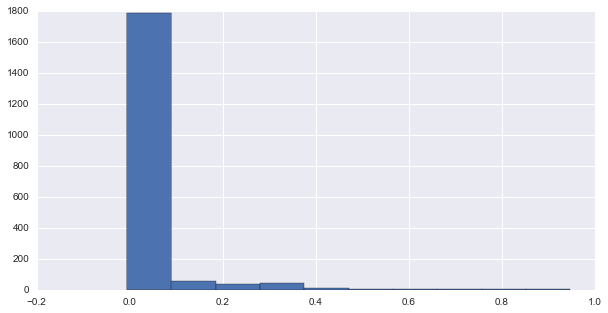

In [84]:
plt.figure(figsize = [10,5])
hour = 1
plt.hist([clf.coef_[i][hour-1] for i in range(np.shape(clf.coef_)[0])], bins = 10)

In [103]:
hour = 24
Y_hour_train = Y_train[:,hour-1]
Y_hour_test = Y_test[:,hour-1]

clf = linear_model.LassoCV()
clf.fit(X_train.values,Y_hour_train)

a=pd.Series([int(clf.coef_[i]!=0) for i in range(len(clf.coef_))])

X_lasso_train = X_train.loc[:,a.values != 0]

X_lasso_test = X_test.loc[:,a.values != 0]


print "The hour(after) : +", hour,"h"
print "The number of variables(original) :", np.shape(X_train)[1]
print "The number of variables(selected by lasso) :", np.shape(X_lasso_train)[1],"\n"

lm_lasso = linear_model.LinearRegression()
lm_lasso.fit(X_lasso_train,Y_hour_train)
MSE = np.mean((Y_hour_test - lm_lasso.predict(X_lasso_test)) ** 2)
R2 = lm_lasso.score(X_lasso_test,Y_hour_test)
R2_adjusted = 1-(1-R2)*(len(X_test-1))/float(len(X_test)- np.shape(X_train)[1]-1)
print 'MSE(gauss-lasso) = ' + str(MSE) 
print 'R2(gauss-lasso) = ' + str(R2) 
print 'R2_adjusted(gauss-lasso) = ' + str(R2_adjusted) +'\n'

MSE = np.mean((Y_hour_test - clf.predict(X_test)) ** 2)
R2 = clf.score(X_test,Y_hour_test)
R2_adjusted = 1-(1-R2)*(len(X_test-1))/float(len(X_test)- np.shape(X_train)[1]-1)
print 'MSE(lasso) = ' + str(MSE) 
print 'R2(lasso) = ' + str(R2) 
print 'R2_adjusted(lasso) = ' + str(R2_adjusted) +'\n'





The hour(after) : + 24 h
The number of variables(original) : 1961
The number of variables(selected by lasso) : 73 

MSE(gauss-lasso) = 215.820813542
R2(gauss-lasso) = 0.25988801489
R2_adjusted(gauss-lasso) = 1.80139514311

MSE(lasso) = 190.37862517
R2(lasso) = 0.347136636708
R2_adjusted(lasso) = 1.70692211312



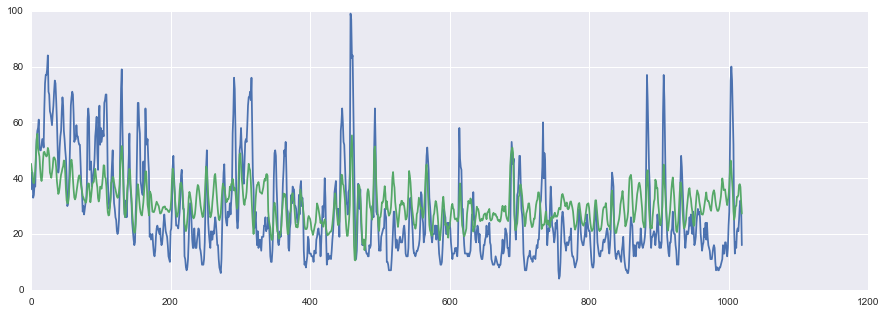

In [104]:
plt.figure(figsize = [15,5])
plt.plot(Y_hour_test)
plt.plot(clf.predict(X_test))

## The Other Variables
* cloudCover
* dewPoint
* humidity
* precipIntensity
* precipProbability
* pressure
* sunPower
* temperature

## Les autres variables

(The results are based on p-values of ANOVA)

### 1.NO2

* XPrecipIntensity_04143
* XPrecipProbability_04143

### 2.O3

* rien

### 3.PM 2.5

* rien

### 4.PM 10

* XPrecipIntensity_04143
* XPrecipProbability_04143







## The Wind
* windBearingCos
* windBearingSin
* windSpeed

We note that the windBearing angle is $\theta$, and the angle of the direction of the stations we what to predict $\alpha$.

$$cos(\alpha - \theta) = cos(\theta)cos(\alpha) + sin(\theta)sin(\alpha)$$

In [ ]:
DataSample(X_train_train,'windBearingCos-windBearingSin').head()

In [ ]:
DataSample(X_train_train,"windSpeed").head()

In [ ]:
plt.figure(figsize = [10,5])
plt.plot(X_train_train['windBearingSin_04099_-2'].values[100:200])

In [ ]:
## MLP (fully connected)